# Pharmaceutical Analysis

## Overview

Analysis was conducted to determine the effectiveness of a potentiat treatment drug for SCC (squamous cell carcinoma). Study involved 249 mice (248 after cleaning data) with SCC tumor growths that were either given the drug-of-interest (Capomulin), one of 8 competitor drugs, or a placebo. Tumor growth and number of metastic sites were measured over 45 days.

## Observations and Insights 

TBD

## Analysis

Code is in python and uses the following libraries: pandas, numpy, scipy, and matplotlib

In [1]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Display mouse dataframe 5 rows

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Display study dataframe 5 rows

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Left join merge of datasets on Mouse ID column

mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display merged dataframe 5 rows

mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Confirm count of unique mice in study

print(f'Number of mice: {mouse_study_df["Mouse ID"].nunique()}')


Number of mice: 249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

duplicate_mice_time = mouse_study_df.loc[
    mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

print(f"Number of duplicates found: {len(duplicate_mice_time)}")
print(f"ID of mouse with duplicate timepoints: {duplicate_mice_time[0]}")


Number of duplicates found: 1
ID of mouse with duplicate timepoints: g989


In [7]:
# Get all the data for the duplicate mouse ID

duplicate_mouse_df = mouse_study_clean = mouse_study_df.loc[
    mouse_study_df["Mouse ID"] == (duplicate_mice_time[0]), :]

# Display duplicate dataframe 5 rows
duplicate_mouse_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [8]:
# Filter dataframe to exclude mouse id equal to "duplicate_mice_time"

mouse_study_clean = mouse_study_df.loc[
    mouse_study_df["Mouse ID"] != (duplicate_mice_time[0]), :]

# Display cleaned dataframe 5 rows
mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Confirm dropped 1 mouse ID by checking unique counts again

print(f'Number of mice after cleaning: {mouse_study_clean["Mouse ID"].nunique()}')

Number of mice after cleaning: 248


## Summary Statistics

In [10]:
# Dataframe grouped by Drug Regimen column
treatment_groups = mouse_study_clean.groupby("Drug Regimen")


# Series of tumor volume by treatment groups
treatment = treatment_groups["Tumor Volume (mm3)"]


# Variables for statistics
mean_treatment = treatment.mean()
median_treatment = treatment.median()
var_treatment = treatment.var()
sd_treatment = treatment.std()
sem_treatment = treatment.sem()


# Summary dataframe of statistic variables
stat_summary_df = pd.DataFrame({
    "Mean":mean_treatment,
    "Median":median_treatment,
    "Variance":var_treatment,
    "Standard Deviation":sd_treatment,
    "SEM":sem_treatment
})

# Display summary dataframe
stat_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Summary statistics using aggregation method 

# Dataframe containing only drug regimen and tumor volume columns
mouse_study_small = mouse_study_clean[["Drug Regimen", "Tumor Volume (mm3)"]]


# Group by drug regimen, and aggregate statistics on tumor volume
mouse_study_small.groupby("Drug Regimen").agg([
    np.mean, np.median, np.var, np.std, sts.sem])


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

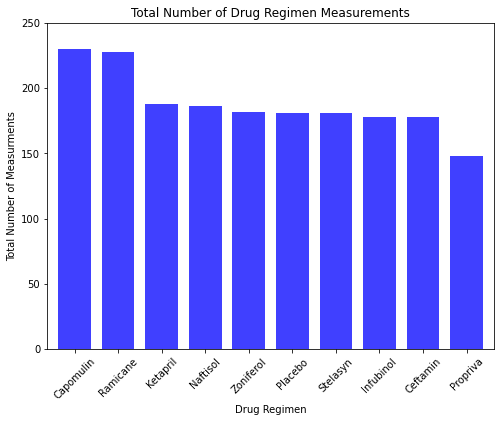

In [12]:
# Bar plot - pandas method

# Count of measurements by drug regimen
bar_data = mouse_study_clean["Drug Regimen"].value_counts()

# Chart bar plot
bar_data.plot(kind="bar", facecolor="blue", figsize=(8,6), 
              title="Total Number of Drug Regimen Measurements", width=0.75,
              xlim=(-1, len(bar_data)), ylim=(0, max(bar_data) + 20),
              xlabel="Drug Regimen", ylabel="Total Number of Measurments",
              alpha=0.75, rot=45)

# show plot
plt.show()

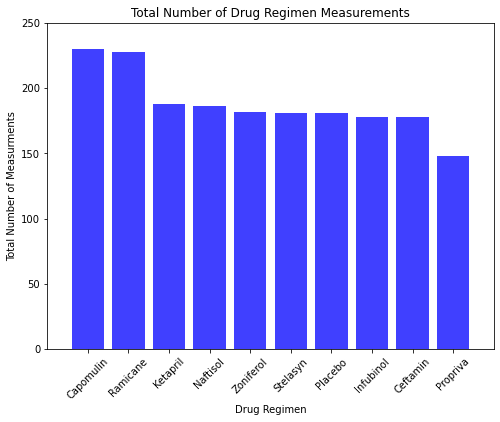

In [13]:
# Bar plot - pyplot method (with numpy)


# Set y-axis to count of measurements by treatment group
y_axis = treatment_groups["Timepoint"].count()
y_axis = y_axis.sort_values(axis=0, ascending=False)

# Set x-axis to array based on number of unique values in Drug Regimen column
x_axis = np.arange(mouse_study_clean["Timepoint"].nunique())

# Set labels equal to key used in y_axis
labels = y_axis.keys()

# tick locations (convert array to list using list comprehension)
tick_locations = [value for value in x_axis]

# Chart bar plot
plt.figure(figsize=(8,6))
plt.bar(x_axis, y_axis, color="blue", alpha=0.75, align="center")
plt.xticks(tick_locations, labels, rotation=45)

# Set x and y limits
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(y_axis) + 20)

# Set labels
plt.title("Total Number of Drug Regimen Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurments")

# show plot
plt.show()

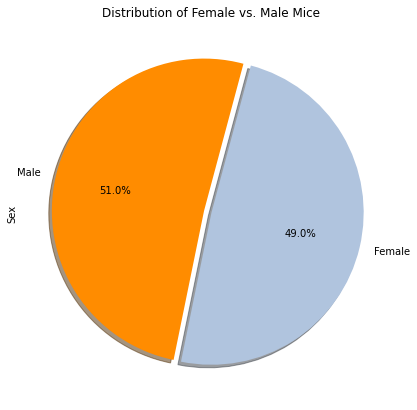

In [14]:
# Pie chart - pandas method

# Count of female versus male mice
pie_data = mouse_study_clean["Sex"].value_counts()

# Chart bar plot
pie_data.plot(kind="pie", explode=(0.05,0), figsize=(7,7), 
              colors=("darkorange", "lightsteelblue"),
              title="Distribution of Female vs. Male Mice",
              shadow=True, startangle=75, autopct="%1.1f%%")

# show plot
plt.show()

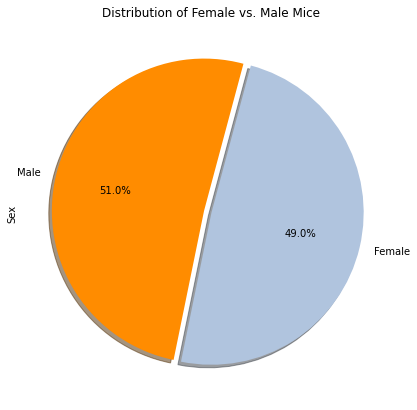

In [15]:
# Pie chart - pyplot method

# Count of female versus male mice
pie_data_2 = mouse_study_clean["Sex"].value_counts()

# label variable for chart
label = pie_data_2.keys()

# Pie chart
plt.figure(figsize=(7,7))

plt.pie(pie_data_2, explode=(0.05,0), labels=label,
       colors=("darkorange", "lightsteelblue"),
       shadow=True, startangle=75, autopct="%1.1f%%")

# Title and y-axis label
plt.title("Distribution of Female vs. Male Mice")
plt.ylabel("Sex")

# show plot
plt.show()

## Quartiles, Outliers, and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Group by Mouse ID, then aggregate via max function
max_time_mouse = mouse_study_clean.groupby("Mouse ID").max()

# Rename column for timepoint to max timepoint
max_time_mouse = max_time_mouse.rename(columns={
    "Timepoint": "Max Timepoint"
})

# Reset index
max_time_mouse = max_time_mouse.reset_index()

# Convert to dataframe
max_time_mouse_df = pd.DataFrame(max_time_mouse)

# Extract Mouse ID and Max Timepoint
max_time_mouse_df = max_time_mouse_df[["Mouse ID", "Max Timepoint"]]

# Merge dataframe with max timepoint into cleaned dataframe
max_time_df = pd.merge(mouse_study_clean, max_time_mouse_df, on="Mouse ID")

# Display new merged dataframe top 5 rows
max_time_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [17]:
# Treatment list for loop and outlier plot labels
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list to fill with tumor vol data for boxplot
tumor_vol = []

# Create new dataframe with filter where Timepoint equals Max Timepoint
max_tumor_time_df = max_time_df.loc[max_time_df["Timepoint"] == max_time_df["Max Timepoint"]]


# Use for loop on treatment_list to go through dataframe
for drug in treatment_list:
    
    # Temp dataframe that saves info when Drug Regimen value is equal to drug in treatment_list
    tumor_size_df = max_tumor_time_df.loc[max_tumor_time_df["Drug Regimen"] == drug]
    
    # Append value in Tumor Volumn column to tumor_vol list
    # This is the tumor volume at the last timestamp
    tumor_vol.append(tumor_size_df["Tumor Volume (mm3)"])
    
    print(f"Outlier investigation for {drug}:")
    
    print()
    
    # Calculate and display results for quartiles, iqr, upper bounds, and lower bounds
    quartiles = (tumor_size_df["Tumor Volume (mm3)"]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of {drug} is: {round(lowerq,2)}")
    print(f"The upper quartile of {drug} is: {round(upperq,2)}")
    print(f"The interquartile range of {drug} is: {round(iqr,2)}")
    print(f"The the median of {drug} is: {round(quartiles[0.5],2)} ")

    print()
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.")
    
    print()
    
    # Identify if any outliers exist in the data (greater than upper bound or lower than lower bound)
    outliers_found = (tumor_size_df["Tumor Volume (mm3)"].loc[
        (tumor_size_df["Tumor Volume (mm3)"] > upper_bound) | 
        (tumor_size_df["Tumor Volume (mm3)"] < lower_bound)]).count()
    
    print(f"{outliers_found} potential outliers exist for {drug}.")
    print()
    print("-" * 50)
    
    

Outlier investigation for Capomulin:

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 

Values below 20.7 could be outliers.
Values above 51.83 could be outliers.

0 potential outliers exist for Capomulin.

--------------------------------------------------
Outlier investigation for Ramicane:

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 

Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

0 potential outliers exist for Ramicane.

--------------------------------------------------
Outlier investigation for Infubinol:

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 

Values below 36.83 could be outliers.
Val

([<matplotlib.axis.XTick at 0x7f80eb3e7fa0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

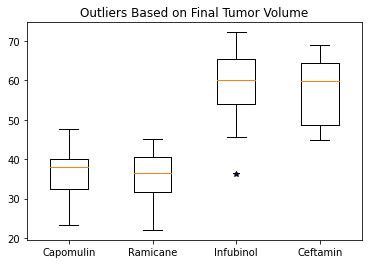

In [18]:
# Boxplot of final tumor volume for 4 drug treatments of interest

# Variable for format of outlier, if found
outlier_symbol = dict(markerfacecolor='blue', marker='*')

# Box plot
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol, flierprops=outlier_symbol)

# Title and labels
ax1.set_title('Outliers Based on Final Tumor Volume')
plt.xticks([1,2,3,4], treatment_list)


## Line and Scatter Plots

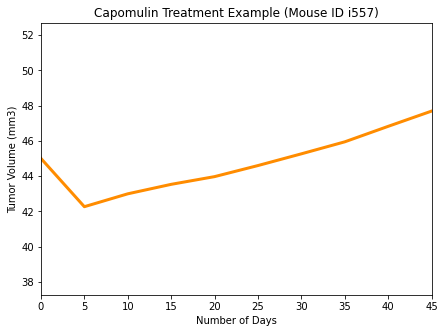

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# NOTE - MOUSE IS SELECTED RANDOMLY (to be dynamic)
# RUNNING THIS CODE WILL CHANGE MOUSE ID RESULTING IN DIFFERENT CHART


# Identify a mouse that survived until end of study and was treated with Capomulin
mouse_options = mouse_study_clean["Mouse ID"].loc[
    (mouse_study_clean["Timepoint"] == 45) &
    (mouse_study_clean["Drug Regimen"] == "Capomulin")]


# Use sample to select 1 mouse from mouse_options at random
one_mouse, = mouse_options.sample(1)  # list slicing to get string
one_mouse_id = one_mouse


# Find data for one mouse
one_mouse_data = mouse_study_clean.loc[
    (mouse_study_clean["Mouse ID"] == one_mouse_id)]

# Extract timepoint and tumor volume columns
one_mouse_data = one_mouse_data[["Timepoint", "Tumor Volume (mm3)"]]


# Line plot for one mouse (x axis is timepoint, y axis is tumor volume)
plt.figure(figsize=(7,5))
plt.plot(one_mouse_data["Timepoint"], one_mouse_data["Tumor Volume (mm3)"],
        color="darkorange", linewidth=3)

# Title and labels
plt.title(f"Capomulin Treatment Example (Mouse ID {one_mouse_id})")
plt.xlabel("Number of Days")
plt.ylabel("Tumor Volume (mm3)")


# Limits for x-axis and y-axis
plt.xlim(0, one_mouse_data["Timepoint"].max())
plt.ylim((one_mouse_data["Tumor Volume (mm3)"].min() - 5),
         (one_mouse_data["Tumor Volume (mm3)"].max() + 5))

# Show plot
plt.show()

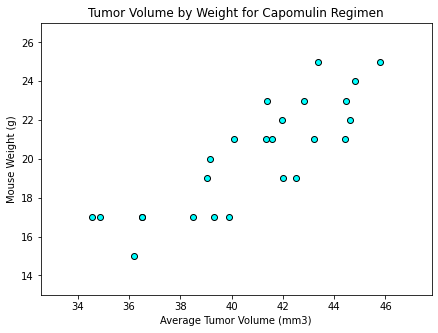

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create dataframe with only Capomuline regimen data and 3 columns extracted
cap_data = mouse_study_clean[["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]].loc[
    mouse_study_clean["Drug Regimen"] == "Capomulin"]

# Group by mouse ID and use aggregate mean function
cap_mouse_group = cap_data.groupby("Mouse ID").mean()

# Rename columns
cap_mouse_group = cap_mouse_group.rename(columns={
    "Tumor Volume (mm3)": "Average Tumor Volume",
    "Weight (g)": "Mouse Weight (g)"
})

# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(cap_mouse_group["Average Tumor Volume"], 
            cap_mouse_group["Mouse Weight (g)"],
            marker="o", facecolors="aqua",
            edgecolors="black")
           
# Title and labels
plt.title("Tumor Volume by Weight for Capomulin Regimen")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")


# Limits for x-axis and y-axis
plt.xlim(cap_mouse_group["Average Tumor Volume"].min() - 2, 
         cap_mouse_group["Average Tumor Volume"].max() + 2)

plt.ylim((cap_mouse_group["Mouse Weight (g)"].min() - 2),
         (cap_mouse_group["Mouse Weight (g)"].max() + 2))

# Show plot
plt.show()

## Correlation and Regression

Examination of relationship between average tumor volume and mouse weight for the Capomulin regimen:

The correlation coefficient is 0.84

The r-squared is 0.71


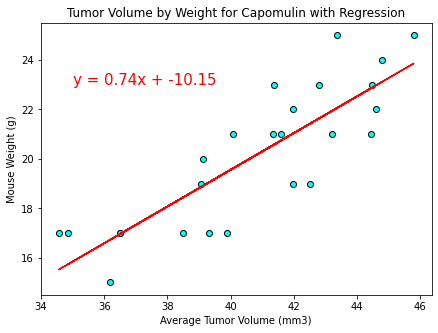

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Store values for x and y axis as variables
x_values = cap_mouse_group["Average Tumor Volume"]
y_values = cap_mouse_group["Mouse Weight (g)"]

# Correlation coefficient
correlation = sts.pearsonr(x_values, y_values)

# Print result of correlation

print("Examination of relationship between average tumor volume and \
mouse weight for the Capomulin regimen:")
print()
print(f"The correlation coefficient is {round(correlation[0],2)}")
print()


# Scatter plot repeat from above, with linear regression


# Linear regression variables to place line on scatter plot
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept


# Linear requestion equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Results of r-squared
print(f"The r-squared is {round(rvalue**2, 2)}")

# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, marker="o", 
           facecolors="aqua", edgecolors="black")

# Add regression line
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (35, 23), fontsize = 15, color="red")
           
# Title and labels
plt.title("Tumor Volume by Weight for Capomulin with Regression")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")

# Show plot
plt.show()